In [1]:
from Stacked_Model import *
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
print(tf.__version__)
import numpy as np
from utils import *


/home/yu.bryan.j/.pyenv/versions/tensorflow/lib/python3.8/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
Using TensorFlow backend.


2.2.0


In [2]:
lookback = 60
lookahead = 5
EPOCHS = 100

X_train, y_train, X_test, y_test, X_val, y_val = load_data(lookback, lookahead)

Number of decreases: 1515, Number of Increases: 1873
Percentage of decreases: 0.44716646989374265
Percentage of increases: 0.5528335301062574


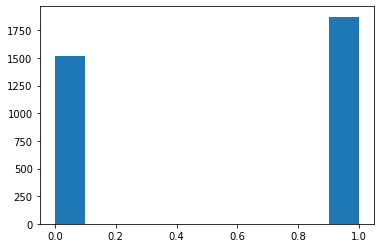

In [3]:
plt.hist(y_train)
uniques, counts = np.unique(y_train,return_counts=True)
print(f'Number of decreases: {counts[0]}, Number of Increases: {counts[1]}')
print(f'Percentage of decreases: {counts[0]/np.sum(counts)}')
print(f'Percentage of increases: {counts[1]/np.sum(counts)}')

###  Squeezing performance out of the LSTM Model

In [23]:
def gan_experiment(gan_epochs = 50, gan_hidden_size =100, SM_epochs = 50, batch_size = 64):
    """
    GAN
    """
    noise_dim = X_train.shape[1]
    gan = GAN_FINANCE(gan_hidden_size,output_size=noise_dim, batch_size=batch_size, noise_dim=noise_dim)
    X_gan = copy.deepcopy(X_train)
    X_gan = tf.data.Dataset.from_tensor_slices(X_gan).batch(batch_size)
    gan.train(X_gan, epochs = gan_epochs, verbose=False)

    """
    Experimental stacked LSTM
    """
    number_of_samples, dim = X_train.shape
    experimental = Experimental(dim, dim, lookahead, gan)
    experimental.compile()
    experimental.train(X_train, y_train, X_val, y_val, epochs=SM_epochs, batch_size=batch_size)
    
    experimental.plot()
    
    return experimental

###  Training the GAN Longer - 100 epochs

In [29]:
%%capture
model = experiment(gan_epochs=300, SM_epochs=50)

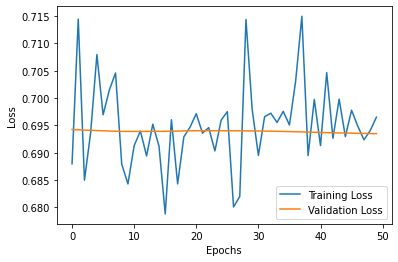

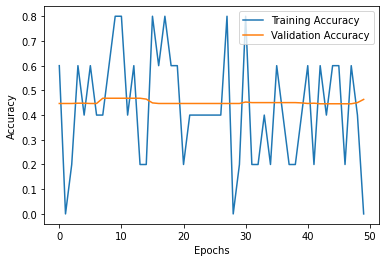

In [30]:
model.plot()

In [26]:
model.get_accuracy(X_test,y_test, lookahead)

0.5429650613786591